In [1]:
#Testing Optimazation algoriths on digits Dataset
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
digits=load_digits()


<Figure size 432x288 with 0 Axes>

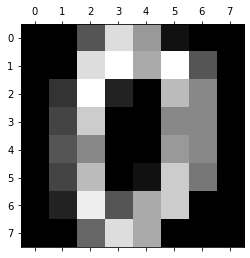

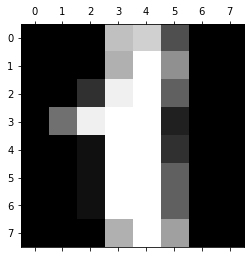

In [2]:
plt.gray()
for i in range(2):
    plt.matshow(digits.images[i])

In [3]:
#Visualizing present available sets
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [4]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [5]:
digits.target[0]

0

In [6]:
digits.DESCR[8]

't'

In [7]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [9]:
#Creating and training a logistic regression model
from sklearn.linear_model import LogisticRegression 
model=LogisticRegression()

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
x_train,x_test,y_train,y_test=train_test_split(digits.data,digits.target,test_size=0.25,train_size=0.75)

In [12]:
#Model training
#Creating and training a logistic regression model
from sklearn.linear_model import LogisticRegression 
model.fit(x_train,y_train)

C:\Users\n\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [13]:
#Measuring Model Accuracy with the test=25% and train_size=75%
#Getting the model Score
model.score(x_test,y_test)

0.9711111111111111

In [14]:
x_train,x_test,y_train,y_test=train_test_split(digits.data,digits.target,test_size=0.4,train_size=0.6)

In [15]:
#Model training
#Creating and training a logistic regression model
from sklearn.linear_model import LogisticRegression 
model.fit(x_train,y_train)

C:\Users\n\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [16]:
#Measuring Model Accuracy with the test=40% and train_size=60%
#Getting the model Score
model.score(x_test,y_test)

0.9624478442280946

In [18]:
#Predicting the set of data upto the last digit set
model.predict(digits.data[0:4])

array([0, 1, 2, 3])

In [19]:
model.predict(digits.data[0:9])

array([0, 1, 2, 3, 4, 9, 6, 7, 8])

In [22]:
#Creating a confusion Matrix
#It actually shows that the elements have been correctly predicted
y_predict=model.predict(x_test)

In [21]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_predict)
cm

array([[70,  0,  0,  0,  2,  1,  2,  0,  0,  0],
       [ 0, 74,  0,  0,  0,  0,  0,  0,  2,  1],
       [ 0,  1, 65,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 66,  0,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0, 72,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  1,  0, 63,  0,  1,  0,  3],
       [ 0,  0,  0,  0,  0,  0, 69,  0,  0,  0],
       [ 0,  2,  0,  0,  0,  0,  0, 74,  1,  0],
       [ 0,  3,  0,  0,  1,  0,  0,  1, 73,  0],
       [ 0,  0,  0,  1,  0,  1,  0,  0,  1, 66]], dtype=int64)

In [ ]:
             #Liblinear
import numpy as np
from scipy import sparse
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, roc_auc_score

from grad_utils import grad_logloss_theta_lr
from grad_utils import batch_grad_logloss_lr
from inverse_hvp import inverse_hvp_lr_newtonCG
from dataset import load_digits,select_from_one_class

import argparse
import time
import pdb
import os
np.random.seed(0)

In [ ]:
# select the dataset used
dataset_name = "load_digits"
# dataset_name = "load_digits"

# parameter for the sigmoid sampling function
sigmoid_k = 10
# regularization parameter for Logistic Regression
C = 0.1
# sample ratio
sample_ratio = 0.6
# flip ratio
flip_ratio = 0.4

In [ ]:
start_time = time.time()
# load data, pick 30% as the Va set
x_train,y_train,x_va,y_va,x_te,y_te = load_data_v1(dataset_name,va_ratio=0.3)
print("x_train, nr sample {}, nr feature {}".format(x_train.shape[0],x_train.shape[1]))
print("x_va,    nr sample {}, nr feature {}".format(x_va.shape[0],x_va.shape[1]))
print("x_te,    nr sample {}, nr feature {}".format(x_te.shape[0],x_te.shape[1]))
print("Tr: Pos {} Neg {}".format(y_train[y_train==1].shape[0],y_train[y_train==0].shape[0]))
print("Va: Pos {} Neg {}".format(y_va[y_va==1].shape[0],y_va[y_va==0].shape[0]))
print("Te: Pos {} Neg {}".format(y_te[y_te==1].shape[0],y_te[y_te==0].shape[0]))
print("Load data, cost {:.1f} sec".format(time.time()-start_time))

In [2]:
        #Computing score
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
digits=load_digits()
from sklearn.linear_model import LogisticRegression 
model=LogisticRegression()
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(digits.data,digits.target,test_size=0.25,train_size=0.75)
from sklearn.linear_model import LogisticRegression 
model.fit(x_train,y_train)
#Measuring Model Accuracy
#Getting the model Score
model.score(x_test,y_test)

C:\Users\n\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9622222222222222

In [ ]:
# get the subset samples number
num_tr_sample = x_train.shape[0]
obj_sample_size = int(sample_ratio * num_tr_sample)


# flip labels
idxs = np.arange(y_train.shape[0])
np.random.shuffle(idxs)
num_flip = int(flip_ratio * len(idxs))
y_train[idxs[:num_flip]] = np.logical_xor(np.ones(num_flip), y_train[idxs[:num_flip]]).astype(int)


# define the full-set-model \hat{\theta}
clf = LogisticRegression(
        C = C,
        fit_intercept=False,
        tol = 1e-8,
        solver="liblinear",
        multi_class="ovr",
        max_iter=100,
        warm_start=False,
        verbose=0,
        )
clf.fit(x_train,y_train)
# on Va
y_va_pred = clf.predict_proba(x_va)[:,1]
full_logloss = log_loss(y_va,y_va_pred)
weight_ar = clf.coef_.flatten()
# on Te
y_te_pred = clf.predict_proba(x_te)[:,1]
full_te_logloss = log_loss(y_te,y_te_pred)
full_te_auc = roc_auc_score(y_te, y_te_pred)
y_te_pred = clf.predict(x_te)
full_te_acc = (y_te == y_te_pred).sum() / y_te.shape[0]


# print full-set-model results
print("[FullSet] Va logloss {:.6f}".format(full_logloss))
print("[FullSet] Te logloss {:.6f}".format(full_te_logloss))

In [ ]:
#Computing AUC
import statsmodels.api as sm
import pandas as pd
import numpy as np
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier, Pool
import tensorflow as tf
dataset_name = "load_digits"
a = tf.Variable([0.1, 0.5])
b = tf.Variable([0.2, 0.6])

auc = tf.contrib.metrics.streaming_auc(a, b)

sess = tf.Session()
sess.run(tf.initialize_all_variables())
sess.run(tf.initialize_local_variables()) 
train_auc = sess.run(auc)

print(train_auc)
#The auc 

In [3]:
#Calculating the Confusion Matrix
y_predict=model.predict(x_test)
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_predict)
cm

array([[51,  0,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 0, 39,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  2, 48,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 37,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  0, 43,  0,  0,  0,  0,  0],
       [ 0,  1,  1,  3,  0, 44,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 48,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  1,  0, 40,  0,  1],
       [ 0,  1,  1,  0,  0,  1,  0,  0, 47,  0],
       [ 0,  1,  0,  0,  0,  1,  0,  0,  0, 36]], dtype=int64)

In [ ]:
import numpy as np
from scipy import sparse
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, roc_auc_score

#from grad_utils import grad_logloss_theta_lr
#from grad_utils import batch_grad_logloss_lr
#from inverse_hvp import inverse_hvp_lr_newtonCG
#from dataset import load_digits,select_from_one_class

import argparse
import time
import pdb
import os
np.random.seed(0)

In [ ]:
# select the dataset used
dataset_name = "load_digits"
# dataset_name = "load_digits"

# parameter for the sigmoid sampling function
sigmoid_k = 10
# regularization parameter for Logistic Regression
C = 0.1
# sample ratio
sample_ratio = 0.6
# flip ratio
flip_ratio = 0.4

In [ ]:
start_time = time.time()
# load data, pick 75% as the Va set
x_train,y_train,x_va,y_va,x_te,y_te = load_data_v1(dataset_name,va_ratio=0.75)
print("x_train, nr sample {}, nr feature {}".format(x_train.shape[0],x_train.shape[1]))
print("x_va,    nr sample {}, nr feature {}".format(x_va.shape[0],x_va.shape[1]))
print("x_te,    nr sample {}, nr feature {}".format(x_te.shape[0],x_te.shape[1]))
print("Tr: Pos {} Neg {}".format(y_train[y_train==1].shape[0],y_train[y_train==0].shape[0]))
print("Va: Pos {} Neg {}".format(y_va[y_va==1].shape[0],y_va[y_va==0].shape[0]))
print("Te: Pos {} Neg {}".format(y_te[y_te==1].shape[0],y_te[y_te==0].shape[0]))
print("Load data, cost {:.1f} sec".format(time.time()-start_time))

In [4]:
        #Computing score
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
digits=load_digits()
from sklearn.linear_model import LogisticRegression 
model=LogisticRegression()
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(digits.data,digits.target,test_size=0.25,train_size=0.75)
from sklearn.linear_model import LogisticRegression 
model.fit(x_train,y_train)
#Measuring Model Accuracy
#Getting the model Score
model.score(x_test,y_test)

C:\Users\n\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9666666666666667

In [ ]:
# get the subset samples number
num_tr_sample = x_train.shape[0]
obj_sample_size = int(sample_ratio * num_tr_sample)


# flip labels
idxs = np.arange(y_train.shape[0])
np.random.shuffle(idxs)
num_flip = int(flip_ratio * len(idxs))
y_train[idxs[:num_flip]] = np.logical_xor(np.ones(num_flip), y_train[idxs[:num_flip]]).astype(int)


# define the full-set-model \hat{\theta}
clf = LogisticRegression(
        C = C,
        fit_intercept=False,
        tol = 1e-8,
        solver="liblinear",
        multi_class="ovr",
        max_iter=100,
        warm_start=False,
        verbose=0,
        )
clf.fit(x_train,y_train)
# on Va
y_va_pred = clf.predict_proba(x_va)[:,1]
full_logloss = log_loss(y_va,y_va_pred)
weight_ar = clf.coef_.flatten()
# on Te
y_te_pred = clf.predict_proba(x_te)[:,1]
full_te_logloss = log_loss(y_te,y_te_pred)
full_te_auc = roc_auc_score(y_te, y_te_pred)
y_te_pred = clf.predict(x_te)
full_te_acc = (y_te == y_te_pred).sum() / y_te.shape[0]


# print full-set-model results
print("[FullSet] Va logloss {:.6f}".format(full_logloss))
print("[FullSet] Te logloss {:.6f}".format(full_te_logloss))

In [ ]:
#Computing AUC
import statsmodels.api as sm
import pandas as pd
import numpy as np
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier, Pool
import tensorflow as tf
dataset_name = "load_digits"
a = tf.Variable([0.1, 0.5])
b = tf.Variable([0.2, 0.6])

auc = tf.contrib.metrics.streaming_auc(a, b)

sess = tf.Session()
sess.run(tf.initialize_all_variables())
sess.run(tf.initialize_local_variables()) 
train_auc = sess.run(auc)

print(train_auc)
#The auc 

In [5]:
#Calculating the Confusion Matrix
y_predict=model.predict(x_test)
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_predict)
cm

array([[47,  0,  0,  0,  0,  0,  2,  0,  0,  0],
       [ 0, 52,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 42,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1, 30,  0,  0,  0,  0,  2,  1],
       [ 0,  0,  0,  0, 47,  0,  0,  0,  0,  0],
       [ 0,  0,  1,  0,  0, 42,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 51,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 42,  0,  1],
       [ 0,  2,  1,  0,  0,  0,  0,  0, 34,  0],
       [ 1,  0,  0,  0,  0,  1,  0,  0,  1, 48]], dtype=int64)

In [ ]:
if_start_time = time.time()
# building precoditioner
test_grad_loss_val = grad_logloss_theta_lr(y_va,y_va_pred,x_va,weight_ar,C,False,0.1/(num_tr_sample*C))
tr_pred = clf.predict_proba(x_train)[:,1]
batch_size = 10000
M = None
total_batch = int(np.ceil(num_tr_sample / float(batch_size)))
for idx in range(total_batch):
    batch_tr_grad = batch_grad_logloss_lr(y_train[idx*batch_size:(idx+1)*batch_size],
        tr_pred[idx*batch_size:(idx+1)*batch_size],
        x_train[idx*batch_size:(idx+1)*batch_size],
        weight_ar,
        C,
        False,
        1.0)

    sum_grad = batch_tr_grad.multiply(x_train[idx*batch_size:(idx+1)*batch_size]).sum(0)
    if M is None:
        M = sum_grad
    else:
        M = M + sum_grad
        
M = M + 0.1/(num_tr_sample*C) * np.ones(x_train.shape[1])
M = np.array(M).flatten()
# computing the inverse Hessian-vector-product
iv_hvp = inverse_hvp_lr_newtonCG(x_train,y_train,tr_pred,test_grad_loss_val,C,True,1e-5,True,M,0.1/(num_tr_sample*C))
# get influence score
total_batch = int(np.ceil(x_train.shape[0] / float(batch_size)))
predicted_loss_diff = []
for idx in range(total_batch):
    train_grad_loss_val = batch_grad_logloss_lr(y_train[idx*batch_size:(idx+1)*batch_size],
        tr_pred[idx*batch_size:(idx+1)*batch_size],
        x_train[idx*batch_size:(idx+1)*batch_size],
        weight_ar,
           C,
        False,
        1.0)

    predicted_loss_diff.extend(np.array(train_grad_loss_val.dot(iv_hvp)).flatten())
    
predicted_loss_diffs = np.asarray(predicted_loss_diff)
duration = time.time() - if_start_time
print("The Influence function's computation completed, cost {:.1f} sec".format(duration))

In [ ]:
print("=="*75)
print("IF Stats: mean {:.10f}, max {:.10f}, min {:.10f}".format(
    predicted_loss_diffs.mean(), predicted_loss_diffs.max(), predicted_loss_diffs.min())
)
# building sampling probability
phi_ar = - predicted_loss_diffs
IF_interval = phi_ar.max() - phi_ar.min()
a_param = sigmoid_k / IF_interval
prob_pi = 1 / (1 + np.exp(a_param * phi_ar))
print("Pi Stats:",np.percentile(prob_pi,[10,25,50,75,90]))

# Do subsampling
pos_idx = select_from_one_class(y_train,prob_pi,1,sample_ratio)
neg_idx = select_from_one_class(y_train,prob_pi,0,sample_ratio)
sb_idx = np.union1d(pos_idx,neg_idx)
sb_x_train = x_train[sb_idx]
sb_y_train = y_train[sb_idx]

# Train the subset-model \tilde{\theta}
clf.fit(sb_x_train,sb_y_train)
y_va_pred = clf.predict_proba(x_va)[:,1]
sb_logloss = log_loss(y_va, y_va_pred)
sb_weight = clf.coef_.flatten()
diff_w_norm = np.linalg.norm(weight_ar - sb_weight)
sb_size = sb_x_train.shape[0]
y_te_pred = clf.predict_proba(x_te)[:,1]
sb_te_logloss = log_loss(y_te,y_te_pred)
sb_te_auc = roc_auc_score(y_te, y_te_pred)
y_te_pred = clf.predict(x_te)
sb_te_acc = (y_te == y_te_pred).sum() / y_te.shape[0]



# baseline: random sampling
u_idxs = np.arange(x_train.shape[0])
uniform_idxs = np.random.choice(u_idxs,obj_sample_size,replace=False)
us_x_train = x_train[uniform_idxs]
us_y_train = y_train[uniform_idxs]
clf.fit(us_x_train, us_y_train)
y_va_pred = clf.predict_proba(x_va)[:,1]
us_logloss = log_loss(y_va, y_va_pred)
us_size = us_x_train.shape[0]
y_te_pred = clf.predict_proba(x_te)[:,1]
us_te_logloss = log_loss(y_te,y_te_pred)
us_te_auc = roc_auc_score(y_te, y_te_pred)
y_te_pred = clf.predict(x_te)
us_te_acc = (y_te == y_te_pred).sum() / y_te.shape[0]



print("=="*75)
print("Result Summary on Va")
print("[SigUIDS]  logloss {:.6f}, # {}".format(sb_logloss,sb_size))
print("[Random]   logloss {:.6f}, # {}".format(us_logloss,us_size))
print("[Full]     logloss {:.6f}, # {}".format(full_logloss,num_tr_sample))
print("Result Summary on Te")
print("[SigUIDS]  logloss {:.6f}, # {}".format(sb_te_logloss,sb_size))
print("[Random]   logloss {:.6f}, # {}".format(us_te_logloss,us_size))
print("[Full]     logloss {:.6f}, # {}".format(full_te_logloss,num_tr_sample))
print("=="*30)
# Attention: if the dataset used here is small, one experiment may fail because of uncertainty of subsampling!
# besides, a proper $k$ for sigmoid sampling function is also important.

In [ ]:
#Newton-cg
import numpy as np
from scipy import sparse
from sklearn.svm import LinearSVC
from sklearn.metrics import log_loss, roc_auc_score

from grad_hinge import batch_grad_hinge_loss, grad_hinge_loss_theta, hessian_hingle_loss_theta
from grad_hinge import inverse_hvp_hinge_newtonCG

from dataset import load_data_v1,select_from_one_class

import argparse
import time
import pdb
import os

np.random.seed(2019)

In [ ]:
# now selecting the dataset used
dataset_name = "load_digits"
# parameter for the sigmoid sampling function
sigmoid_k = 10
# sample ratio
sample_ratio = 0.6
flip_ratio = 0.4

acc_func = lambda x,y: (x==y).sum() / y.shape[0]

In [ ]:
start_time = time.time()
# load data, pick 60% as the Va set
x_train,y_train,x_va,y_va,x_te,y_te = load_data_v1(dataset_name,va_ratio=0.6)
print("x_train, nr sample {}, nr feature {}".format(x_train.shape[0],x_train.shape[1]))
print("x_va,    nr sample {}, nr feature {}".format(x_va.shape[0],x_va.shape[1]))
print("x_te,    nr sample {}, nr feature {}".format(x_te.shape[0],x_te.shape[1]))
print("Tr: Pos {} Neg {}".format(y_train[y_train==1].shape[0],y_train[y_train==0].shape[0]))
print("Va: Pos {} Neg {}".format(y_va[y_va==1].shape[0],y_va[y_va==0].shape[0]))
print("Te: Pos {} Neg {}".format(y_te[y_te==1].shape[0],y_te[y_te==0].shape[0]))
print("Load data, cost {:.1f} sec".format(time.time()-start_time))

In [6]:
      #Computing score
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
digits=load_digits()
from sklearn.linear_model import LogisticRegression 
model=LogisticRegression()
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(digits.data,digits.target,test_size=0.25,train_size=0.75)
from sklearn.linear_model import LogisticRegression 
model.fit(x_train,y_train)
#Measuring Model Accuracy
#Getting the model Score
model.score(x_test,y_test)

C:\Users\n\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9666666666666667

In [ ]:
num_tr_sample = x_train.shape[0]
obj_sample_size = int(sample_ratio * num_tr_sample)

# define the full-set-model \hat{\theta}
clf = LinearSVC(loss="squared_hinge", dual=False, fit_intercept=False)

# flip labels
idxs = np.arange(y_train.shape[0])
np.random.shuffle(idxs)
num_flip = int(flip_ratio * len(idxs))
y_train[idxs[:num_flip]] = np.logical_xor(np.ones(num_flip), y_train[idxs[:num_flip]]).astype(int)
                                                                                              
# zero to -1
y_train[y_train == 0] = -1
y_va[y_va == 0] = -1
y_te[y_te == 0] = -1


clf.fit(x_train,y_train)

In [ ]:
#Computing AUC
import statsmodels.api as sm
import pandas as pd
import numpy as np
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier, Pool
import tensorflow as tf
dataset_name = "load_digits"
a = tf.Variable([0.1, 0.5])
b = tf.Variable([0.2, 0.6])

auc = tf.contrib.metrics.streaming_auc(a, b)

sess = tf.Session()
sess.run(tf.initialize_all_variables())
sess.run(tf.initialize_local_variables()) 
train_auc = sess.run(auc)

print(train_auc)

In [ ]:
y_va_pred = clf.predict(x_va)
full_acc = acc_func(y_va, y_va_pred)
weight_ar = clf.coef_.flatten()
# on Te
y_te_pred = clf.predict(x_te)
full_te_acc = acc_func(y_te,y_te_pred)
full_te_auc = roc_auc_score(y_te,y_te_pred)
# print full-set-model results
print("[FullSet] Va acc {:.6f}".format(full_acc))
print("[FullSet] Te acc {:.6f}".format(full_te_acc))

In [ ]:
Function value: -0.08498508673969181
Split function value: 0.0, -0.08498508673969181
Optimization terminated successfully.
         Current function value: -0.084985
         Iterations: 1
        Function evaluations: 2
        Gradient evaluations: 2
        Hessian evaluations: 1
implicit hessian-vector products mean: -0.07872199256311764
implicit hessian-vector products norm: 0.29152201758991003
Inverse HVP took 0.0 sec
The Influence function's computation completed, cost 0.0 sec

In [7]:
#Calculating the Confusion Matrix
y_predict=model.predict(x_test)
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_predict)
cm

array([[44,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 49,  0,  0,  0,  0,  0,  0,  0,  1],
       [ 0,  0, 43,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 38,  0,  0,  0,  0,  1,  1],
       [ 0,  1,  0,  0, 42,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 46,  0,  1,  0,  2],
       [ 0,  0,  0,  0,  0,  0, 46,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 44,  0,  1],
       [ 0,  3,  0,  0,  0,  0,  0,  0, 42,  0],
       [ 0,  0,  0,  0,  1,  0,  0,  0,  1, 41]], dtype=int64)

In [ ]:
#lbfgs 
import numpy as np
import torch
import torch.optim
import torch.nn as nn
import torch.nn.functional as F
from tensorflow.keras.datasets import cifar10 # to load dataset

from utils import compute_stats, get_grad
from LBFGS import FullBatchLBFGS


In [ ]:
# Parameters for L-BFGS training
# Load data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255
X_test = X_test / 255

X_train = np.transpose(X_train, (0, 3, 1, 2))
X_test = np.transpose(X_test, (0, 3, 1, 2))

# Define network
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 1000)
        self.fc2 = nn.Linear(1000, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x


In [ ]:
# Check cuda availability
cuda = torch.cuda.is_available()

# Create neural network model
if cuda:
    torch.cuda.manual_seed(2018)
    model = ConvNet().cuda()
else:
    torch.manual_seed(2018)
    model = ConvNet()

# Define helper functions

# Forward pass
if cuda:
    opfun = lambda X: model.forward(torch.from_numpy(X).cuda())
else:
    opfun = lambda X: model.forward(torch.from_numpy(X))

# Forward pass through the network given the input
if cuda:
    predsfun = lambda op: np.argmax(op.cpu().data.numpy(), 1)
else:
    predsfun = lambda op: np.argmax(op.data.numpy(), 1)


In [1]:
# Do the forward pass, then compute the accuracy
accfun = lambda op, y: np.mean(np.equal(predsfun(op), y.squeeze())) * 100

# Define optimizer
optimizer = FullBatchLBFGS(model.parameters(), lr=1., history_size=10, line_search='Wolfe', debug=True)

# Main training loop
no_samples = X_train.shape[0]

# compute initial gradient and objective
grad, obj = get_grad(optimizer, X_train, y_train, opfun)

# main loop
for n_iter in range(max_iter):

    # training mode
    model.train()

    # define closure for line search
    def closure():

        optimizer.zero_grad()

        if cuda:
            loss_fn = torch.tensor(0, dtype=torch.float).cuda()
        else:
            loss_fn = torch.tensor(0, dtype=torch.float)

        for subsmpl in np.array_split(np.arange(no_samples), max(int(no_samples / ghost_batch), 1)):

            ops = opfun(X_train[subsmpl])

            if cuda:
                tgts = torch.from_numpy(y_train[subsmpl]).cuda().long().squeeze()
            else:
                tgts = torch.from_numpy(y_train[subsmpl]).long().squeeze()

            loss_fn += F.cross_entropy(ops, tgts) * (len(subsmpl) / no_samples)

        return loss_fn


NameError: name 'FullBatchLBFGS' is not defined

In [8]:
   #Computing score
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
digits=load_digits()
from sklearn.linear_model import LogisticRegression 
model=LogisticRegression()
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(digits.data,digits.target,test_size=0.25,train_size=0.75)
from sklearn.linear_model import LogisticRegression 
model.fit(x_train,y_train)
#Measuring Model Accuracy
#Getting the model Score
model.score(x_test,y_test)

C:\Users\n\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9466666666666667

In [ ]:
 # perform line search step
    options = {'closure': closure, 'current_loss': obj}
    obj, grad, lr, _, _, _, _, _ = optimizer.step(options)

    # compute statistics
    model.eval()
    train_loss, test_loss, test_acc = compute_stats(X_train, y_train, X_test, y_test, opfun, accfun,
                                                    ghost_batch=128)

    # print data
    print('Iter:', n_iter + 1, 'lr:', lr, 'Training Loss:', train_loss, 'Test Loss:', test_loss,
          'Test Accuracy:', test_acc)

In [ ]:
#Computing AUC
import statsmodels.api as sm
import pandas as pd
import numpy as np
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier, Pool
import tensorflow as tf
dataset_name = "load_digits"
a = tf.Variable([0.1, 0.5])
b = tf.Variable([0.2, 0.6])

auc = tf.contrib.metrics.streaming_auc(a, b)

sess = tf.Session()
sess.run(tf.initialize_all_variables())
sess.run(tf.initialize_local_variables()) 
train_auc = sess.run(auc)

print(train_auc)


In [5]:
# compute statistics
model.eval()
train_loss, test_loss, test_acc = compute_stats(X_train, y_train, X_test, y_test, opfun, accfun,
                                                    ghost_batch=128)

    # print data
print('Iter:', n_iter + 1, 'lr:', lr, 'Training Loss:', train_loss, 'Test Loss:', test_loss,
          'Test Accuracy:', test_acc)

NameError: name 'model' is not defined

In [1]:
#Calculating the Confusion Matrix
y_predict=model.predict(x_test)
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_predict)
cm

NameError: name 'model' is not defined

In [ ]:
#The end of optimization